In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# ---------------------- DATA PREPROCESSING -----------------------------------------
# Only 2021 data

data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']] 
data21['month'] = [d.date().month for d in data21['Date']] 
data21['time'] = [d.time() for d in data21['Date']] 
data21['hour'] = [d.time().hour for d in data21['Date']] 
data21['time'] = data21['time'].astype(str) 
empty_list = [] 
for timestr in data21['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 

data21['seconds'] = empty_list
print('----------------------------------------------------------------------------')

print('------------------------- Normalizing data ---------------------------------')
data21['District'] = (data21['District'] - data21['District'].min())/(data21['District'].max()-data21['District'].min()) 
data21['seconds'] = (data21['seconds'] - data21['seconds'].min())/(data21['seconds'].max()-data21['seconds'].min())
data21['hour'] = (data21['hour'] - data21['hour'].min())/(data21['hour'].max()-data21['hour'].min())
data21['month'] = (data21['month'] - data21['month'].min())/(data21['month'].max()-data21['month'].min())
data21['IUCR'] = data21.IUCR.str.extract('(\d+)', expand=True).astype(int)
data21['IUCR'] = (data21['IUCR'] - data21['IUCR'].min())/(data21['IUCR'].max()-data21['IUCR'].min())
print('----------------------------------------------------------------------------')

--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7423485, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(161283, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------
----------------------------------------------------------------------------
------------------------- Normalizing data ---------------------------------
----------------------------------------------------------------------------


In [3]:
sub_data1 = data21[['IUCR', 'District']]

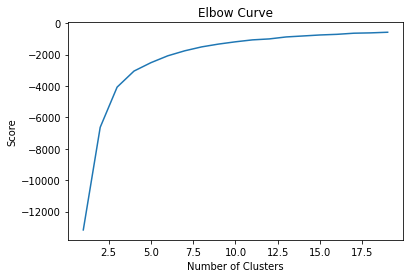

In [4]:
# KMEANS - IUCR vs DISTRICT

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [9]:
km = KMeans(n_clusters=3) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_4763/301562898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


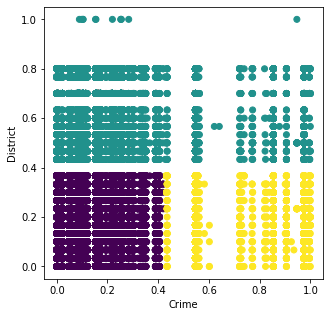

In [10]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

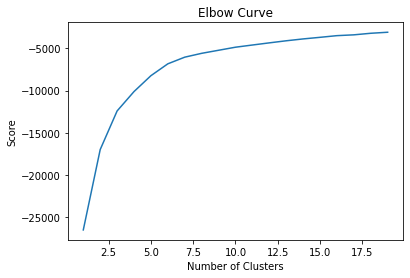

In [11]:
# KMEANS - IUCR vs DISTRICT

# Getting the data ready
sub_data1 = data21[['IUCR', 'District', 'seconds']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [13]:
km = KMeans(n_clusters=3) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_4763/301562898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


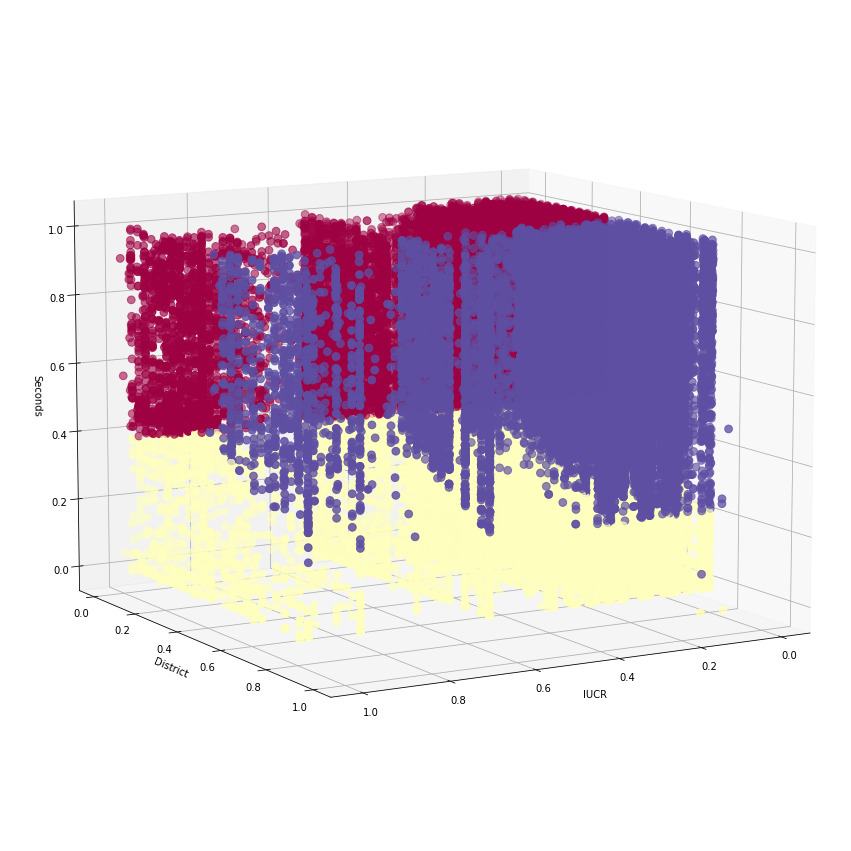

In [14]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

/tmp/ipykernel_4763/886426311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


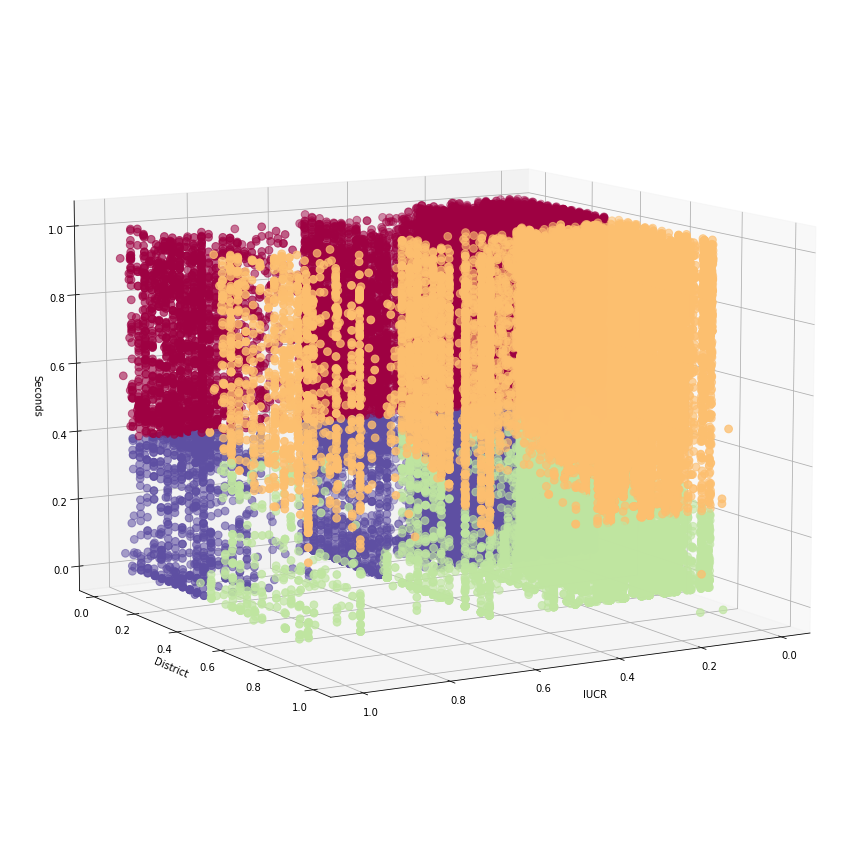

In [15]:
km = KMeans(n_clusters=4) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

/tmp/ipykernel_4763/2361485502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


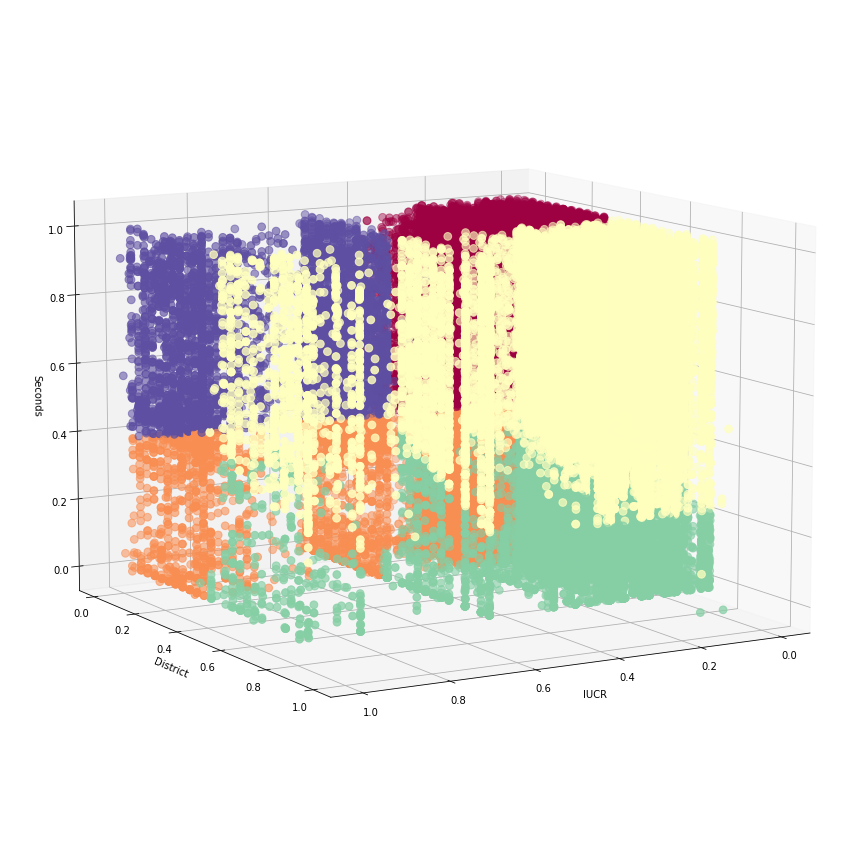

In [16]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 